
## Analytics Specializations & Applications - Week 2

# Charge-off Analysis - Captial One Example Case Study
----------

In this task we are going to "upgrade" the last tutorial we did in FBA. 

Recall the task - when Capital One's customers come in financial difficulties, they risk having to "write-off" their debt (losing the company money). Now, that fall into financial problems does not usually happen at once, and Capital One try to predict that it might happen, so that they can intervene. 

There are several indicators which can be used to anticipate the final outcome, such as late payments, calls to the customer services, enquiries about the products, a different browsing pattern on the web or mobile app. By using these features in our analysis, it can be possible to prevent, or at least guide the process and provide a better service for the customer as well as reduced risks for companies like Capital one.

## Scenario:
So we are going to first refresh on this exercise, to re-friend you with sklearn, and python (which we will continue to use for the whole of the ASA module!). We are again going to predict defaulting, but the objective is very much to cement the knowledge you should already have in the locker with a real world application, before we move on to pastures new in the coming weeks!

As such you need to ensure that you have a full grasp of this exercise before next week. Credit Analysis was selected to start us off on the course given that it is a specialization where they predominantly apply concepts we've already learned - however, as you may have noted, they are rapidly branching out to media and text mining analytics, which are coming up soon.

Ok, so the same dataset we used before containing some historical features for a range of customers is availabe on the ASA moodle site (credit_card_history.csv), and we will unpick those in order to produce a model that can help the credit agency recognize that the "charge-off" might be ahead for any particular customer.

### Task 1: Preparing the data
First we need to examine and prepare our dataset ("credit_card_history.csv") which has been provided in the same folder as this case study. I have left in the code to do this below in several instances, so you can fast track through it - but ensure that you *understand* what it is doing (consider it revision!).

<span style="font-weight:bold; color:green;">&rarr; Your first task is to complete the script below, load in the dataset and put the input features and output features (the last field in the file) into their own variables, X and Y respectively:<span/>

Refer to previous examples from FBA if needed... but better still look up the pandas read_csv documentation on Google.

In [18]:
import pandas

#-- load in the data
filename = "credit_card_history.csv"
data = pandas.read_csv(filename)

#-- let's have a look at the features
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

print("Number of Datapoints:", X.shape[0])
print("Number of Input Features:", X.shape[1])


Number of Datapoints: 30000
Number of Input Features: 23


### Task 2a:  Examining the credit card data
Great. As before you should see we have 23 features and 30000 datapoints (i.e. histories of 30000 customers). Use your knowledge of pandas dataframes to print out the head of the file - the first 5 lines should do:

In [19]:
#-- this you should definitely remember how to do!
print(data.head(5))

   LIMIT  SEX  EDUCATION  MARRIAGE  AGE  STATUS_JAN  STATUS_FEB  STATUS_MAR  \
0    500    2          2         1   24           2           2          -1   
1   2900    2          2         2   26          -1           2           0   
2   1700    1          2         2   30           1           2           2   
3    500    1          1         2   24           0           0           2   
4   2900    2          2         1   39          -1          -1          -1   

   STATUS_APR  STATUS_MAY  ...  BILL_APR  BILL_MAY  BILL_JUN  PAY_JAN  \
0          -1          -2  ...     0.000     0.000     0.000    0.000   
1           0           0  ...    78.528    82.920    78.264    0.000   
2           0           0  ...  1602.768   867.288   885.456   76.800   
3           2           2  ...   440.112   429.720   458.496   76.800   
4          -1          -1  ...     0.000    15.168     7.584    7.584   

   PAY_FEB  PAY_MAR  PAY_APR  PAY_MAY  PAY_JUN  DEFAULTED  
0   16.536      0.0    0.0

You'll have noticed that the target class "DEFAULTED" is a binary variable and already in the format we need, which is great. The rest of the schema is as follows:

In [20]:

#    ----------------------------------------------------------------------------------------
#    Name                 Description        
#    -------------------- -------------------------------------------------------------------
#    LIMIT                Credit limit available to the customer (£): 
#                        
#    SEX                  Gender (1 = male; 2 = female)
#   
#    EDUCATION            Education (1 = postgrad; 2 = undergrad; 3 = high school; 4 = others)
#   
#    MARRIAGE             Marital status (1 = married; 2 = single; 3 = others)
#   
#    AGE                  Age (years)
#   
#    STATUS_[]            How far or ahead the credit card holder was on their payments for
#                         each month from JAN to JUN (giving us 5 fields here). The measurement 
#                          is in months, as follows:
#                         -1 = one month ahead of payments
#                         0 = up to date with payments
#                         1 = one month behind on payments
#                         2 = two months behind on payments
#                         ...
#                        
#    BILL_[]              Amount on the credit card statement for the specified month, from
#                         JAN to JUN (£), so again 5 fields.
#                         
#    PAY_[]               Amount the credit card holder paid that month, from JAN to JUN (£).
#
#    DEFAULTED            Whether the credit card user then went on to default the next month
#                         (0 = no, 1 = yes)
#    ----------------------------------------------------------------------------------------


I've left this as a comment, as it's always useful to have the description of elements in your code for future reference. I recommend you do this yourself too, as it saves a lot of looking up schemas in other documents.


### Task 2b: Tidying up the different feature categories
As with the FICO categorizations for credit analytics that were mentioned in the lecture, these fields fit into different categories. The first 5 fields let's call "demographics" (despite including "limit" too), then fields 5 to 10 the "statuses" for the last five months available, fields 11-16 are the "bills" for each of the last 5 months, and then finally we have payments. 
 
<span style="font-weight:bold; color:green;">&rarr; Separate some field names into their own lists - this will be useful later:<span/>


In [21]:
#-- just to help us analyse let's set up some column name sets
demographics = data.columns[0:5]
statuses = data.columns[5:11]
bills = data.columns[11:17]
payments = data.columns[17:23]

#-- have a look at the demographic features
print(data[demographics].head(5))

#-- now let's consider the payment status histories for the last 6 months
print(data[statuses].head(10))

   LIMIT  SEX  EDUCATION  MARRIAGE  AGE
0    500    2          2         1   24
1   2900    2          2         2   26
2   1700    1          2         2   30
3    500    1          1         2   24
4   2900    2          2         1   39
   STATUS_JAN  STATUS_FEB  STATUS_MAR  STATUS_APR  STATUS_MAY  STATUS_JUN
0           2           2          -1          -1          -2          -2
1          -1           2           0           0           0           2
2           1           2           2           0           0           2
3           0           0           2           2           2           2
4          -1          -1          -1          -1          -1          -1
5           2           0           0           2           2           2
6          -2          -2          -2          -2          -2          -2
7           1          -2          -1          -1          -1          -1
8           2           0           0           0           0           0
9           1       

### Task 2c: Summarizing the data with Graphs

Great, now lets get a sense of the variables visually. This is really easy in a script, but it's a bit fiddly, so as before I've done it inline for you below.

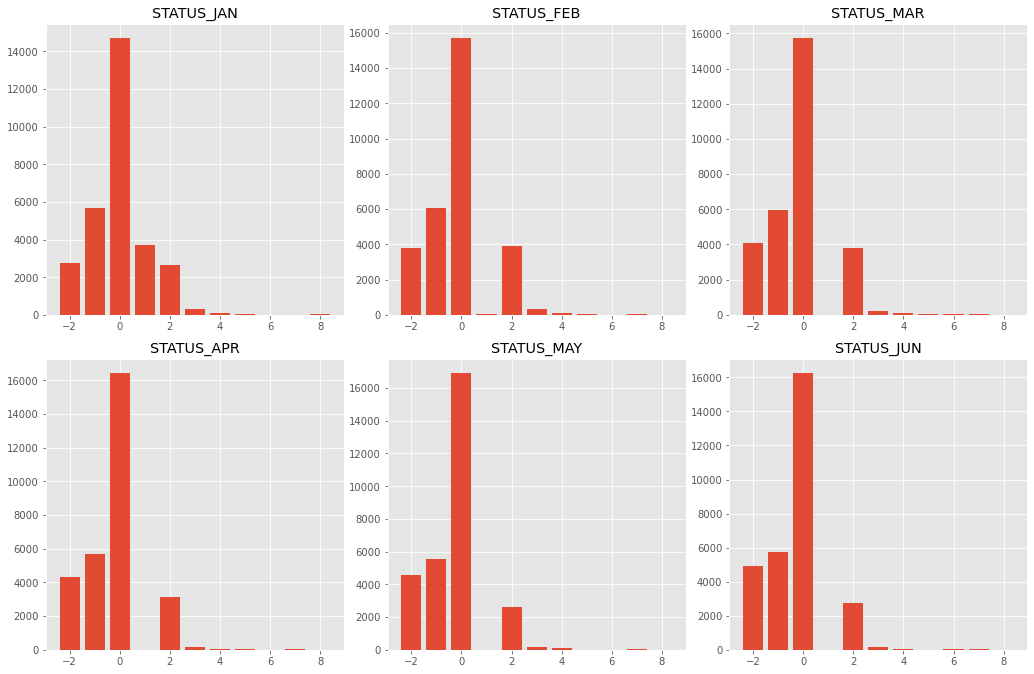

In [22]:
#-- and get a sense of them visually
%matplotlib inline
import matplotlib.pyplot as plt

#-- use a nice style
plt.style.use('ggplot')

#-- set the size of the figure and the font size
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})

#-- setup the layout of the figure as 2 rows and 3 columns
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

#-- loop through each of the "PAY" features and plot counts
for i, feature in enumerate(statuses):
   
   #-- use the pandas counting function to get the no. items in the field
   counts  = data[feature].value_counts()

   #-- calculate the  row and column of the current sub-figure
   row, col = int(i / 3), i % 3
    
   #-- for the current sub-figure create a bar chart
   ax[row, col].bar(counts.index, counts, align='center')
   ax[row, col].set_title(feature)

#-- show the results on screen
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Really make sure you undestand what this code is doing - play around with it, find out what "enumerate" does and ensure you understand what the loop is doing. Once you do, create some graphs yourself, but this time for the payments, with two per row...and make the graphs purple (N/LAB's favourite non-spectral colour!).

<span style="font-weight:bold; color:green;">&rarr; Create some more graphs here yourself, but this time for the "payments" colunns.:</span>

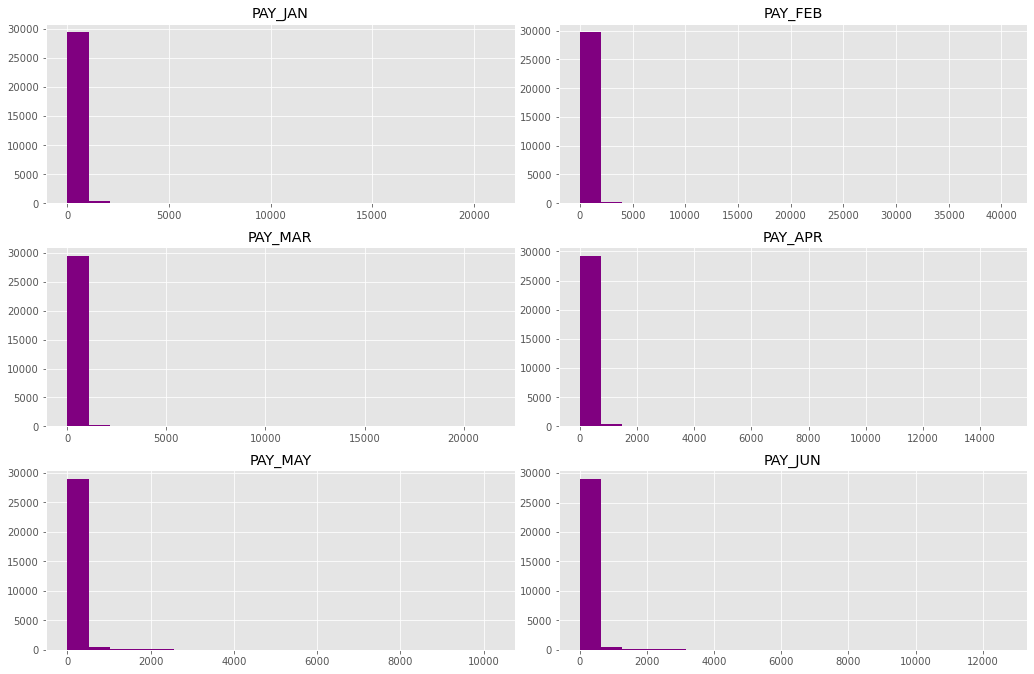

In [23]:
#-- create some more graphs yourself here, but this time for payments.
#-- see if you can do it from scratch without referring to the previous example as much as possible.
#-- coming up with anything yourself, is better than simply cutting and pasting!

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size':10})

fig,ax = plt.subplots(3,2)
fig.set_size_inches(15,10)

for i, feature in enumerate(payments):
    counts = data[feature]
    row, col = int(i/2), i%2
    
    ax[row,col].hist(counts,bins=20, color='purple')
    ax[row,col].set_title(feature)
    
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

### Task 2d: Creating some nice summary Histograms Value
Again, let's just rush through making some histograms too - they paint a great picture of the distribution of the data. Lool up the matplotlib hist() function on Google and produce one. 

<span style="font-weight:bold; color:green;">&rarr; Recalculate the lifetime value of customers following OPTION A and OPTION_B using a loop for each:</span>

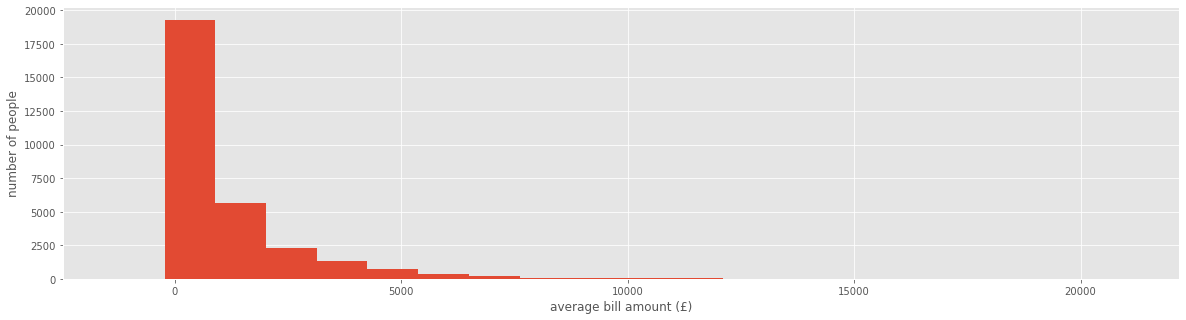

In [24]:
#-- for each person what's the average on their account each month?
plt.rcParams['figure.figsize'] = (20.0, 5.0)

#-- add your histogram line here!
plt.hist(data[bills].mean(axis=1), 20)

#-- some labelling.
plt.xlabel("average bill amount (£)")
plt.ylabel("number of people")
plt.show()


<span style="font-weight:bold; color:green;">&rarr;  And if you've managed that, let's view one for peoples "LIMIT" field, with 50 bins and using the colour purple:</span>

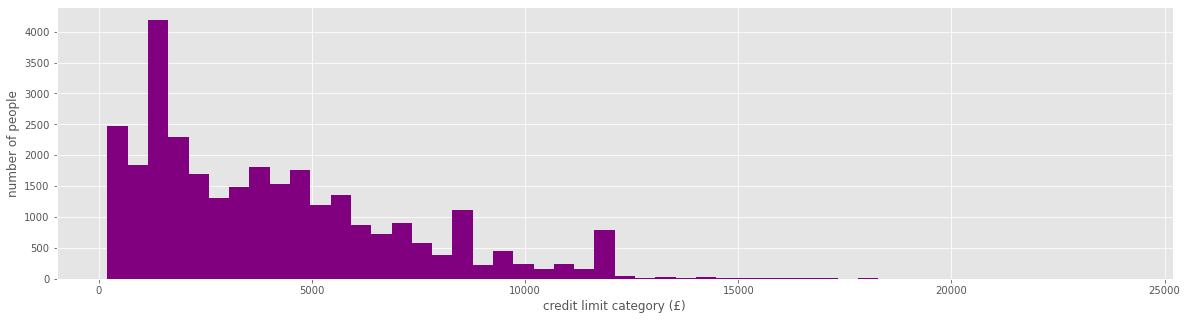

In [25]:
#-- and let's have a look at the limit balance's people have too
counts, bins, patches = plt.hist(data["LIMIT"], 50, color='purple')
plt.xlabel("credit limit category (£)")
plt.ylabel("number of people")
plt.show()

### Task 2e: Explore the Charge-off rate ("DEFAULTED")

Great, we have some good summaries there, and now lets make predictions. First off, let's start with an overarching view of the problem. We want to predict defaulting, Let's answer the following questions:

* How many cases do we have on our dataset to work with?
* What is the breakdown depending on some of the variables available?

defaulting accounts are 22.12% out of 30000 observations


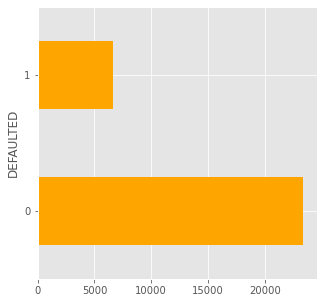

In [26]:
fig = plt.figure()
fig.set_size_inches(5,5)

#-- group the defatulted variable into it's two classes and count them
d = data.groupby(['DEFAULTED']).size()

print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

#-- consider the different kinds of "plot" in the online documenation and have a play around
p = d.plot(kind='barh', color='orange')

### Task 2f: Explore some other statistics!
Let's have a look at a number of histograms to see how defaulting is correlated with the categorical variables available, before that let's make use of categorical features of pandas:

<span style="font-weight:bold; color:green;">&rarr;  Make sure you understand what is going on here and the complete the middle graph:</span>

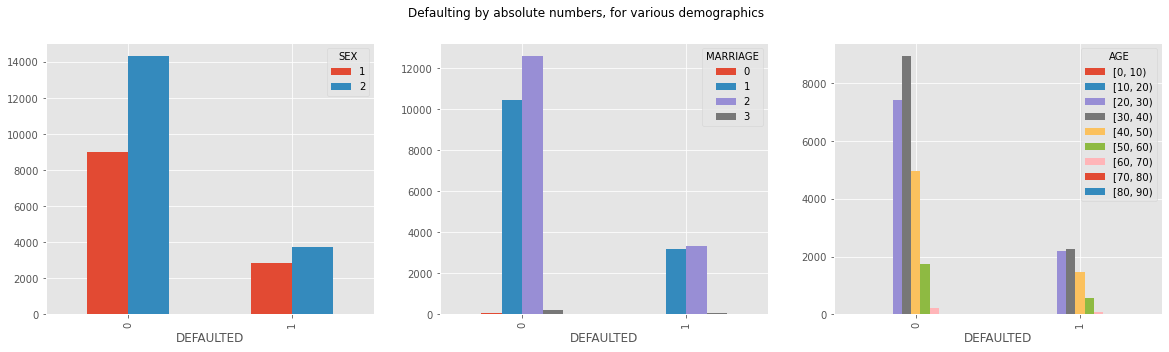

In [27]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

#-- create a plot for split by gender
d = data.groupby(['DEFAULTED', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

#-- create another plot for "MARRIAGE"
d = data.groupby(['DEFAULTED', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

#-- create a plot for split by "AGE"
data['AGE'] = pandas.cut(data['AGE'], range(0, 100, 10), right=False)
d = data.groupby(['DEFAULTED', 'AGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

Note, how pandas let us really easily cut up the age into categories using the "cut()" function. Remember you never need to memorize these - just know they exist and then refer to prior examples or the web documentation.


> This concludes our refresher of pandas, seaborn and what we looked at in FBA. Time to move on!

In [15]:
print("<-- pat self momentarily on the back")

<-- pat self momentarily on the back






### Task 3a: Moving on to Feature engineering
We now begin to extend what we did previously. When you analyse data from CSV's often it's not about blind feature conversion to values between 0 and 1 - it's about understanding data, and working out how best to input it into your models. 

To that end, let's first create some aggregate variables. Use the .mean() and .std() methods which will use a paramater of axis=1 (to indicate that you want the column averaged not the row) to do this below:

<span style="font-weight:bold; color:green;">&rarr; Create the following new features:</span>

In [16]:
X['STATUS_MEAN'] = data[statuses].mean(axis=1)
X['STATUS_STD'] = data[statuses].std(axis=1)

X['BILL_MEAN'] = data[bills].mean(axis=1)
X['BILL_STD'] = data[bills].std(axis=1)

X['PAY_MEAN'] = data[payments].mean(axis=1)
X['PAY_STD'] = data[payments].std(axis=1)

X.describe()

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,STATUS_MEAN,STATUS_STD,BILL_MEAN,BILL_STD,PAY_MEAN,PAY_STD
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4016.316667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,125.416356,115.825845,115.185303,125.172062,-0.182439,0.454326,1079.446685,289.866901,126.605570,139.318044
std,3113.527887,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,422.567075,375.987834,366.679336,426.659179,0.982176,0.516221,1518.257325,487.251580,243.310712,360.154535
min,200.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-1345.036000,0.000000,0.000000,0.000000
25%,1200.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,9.360000,7.104000,6.060000,2.826000,-0.833333,0.000000,114.752000,37.198445,26.719000,14.768488
50%,3400.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.200000,36.000000,36.000000,36.000000,0.000000,0.408248,505.244000,109.911892,57.532000,33.928659
75%,5800.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,108.120000,96.318000,96.756000,96.000000,0.000000,0.836660,1370.506000,344.454230,134.014000,99.046983
max,24000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,21504.960000,14904.000000,10236.696000,12687.984000,6.000000,3.204164,21055.532000,15546.913226,15056.264000,15602.360132


### Task 3b - Examining Variable Importance
While we're here, lets do something that's very useful. Finding out what the most important variables are for the problem! To do this we use a special sklearn command called SelectKBest. This works as follows - remember it, and make sure you understand it, as it's a very useful item to avoid the curse of dimensionality.

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

#-- let's select the best 5 features - n.b. here we just tell the tool to use the "f_classif" function
#-- when it does it's job to measure what is best (There are other options such as mututal information). 
#-- We don't call that function though, we just supply its name as a parameter.
selector = SelectKBest(f_classif, 5)

#-- having parameterized the tool, let's fit the data
selector.fit(X, Y)

/Users/gavinshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SelectKBest(k=5)

Our model is fit so let's have a look at it's scores:

In [18]:
print(selector.scores_)

[7.23454111e+02 4.79788543e+01 2.35471118e+01 1.77812714e+01
 5.78855582e+00 3.53771497e+03 2.23916914e+03 1.75746644e+03
 1.47684597e+03 1.30459118e+03 1.08540249e+03 1.15805315e+01
 6.04423789e+00 5.94438771e+00 3.09474518e+00 1.37108740e+00
 8.65820292e-01 1.60403810e+02 1.03291524e+02 9.52180109e+01
 9.71880005e+01 9.14298008e+01 8.50890453e+01 2.59075319e+03
 1.98152735e+03 4.83257470e+00 1.92457893e+02 3.17598973e+02
 1.65291839e+02]


The **scores_** attribute just tells us (in order) how important the tool thinks our variables are. To put the names of the most important features in order based on these results try the following:

In [19]:
import numpy as np

#-- this is a relatively complicated line that creates an order set of indeces of the best variables
#-- don't worry about it for now - just work out what its creating and cut and paste it when you need it.
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
print(X.columns[top_indices])


Index(['STATUS_JAN', 'STATUS_MEAN', 'STATUS_FEB', 'STATUS_STD', 'STATUS_MAR',
       'STATUS_APR', 'STATUS_MAY', 'STATUS_JUN', 'LIMIT', 'PAY_MEAN',
       'BILL_STD', 'PAY_STD', 'PAY_JAN', 'PAY_FEB', 'PAY_APR', 'PAY_MAR',
       'PAY_MAY', 'PAY_JUN', 'SEX', 'EDUCATION', 'MARRIAGE', 'BILL_JAN',
       'BILL_FEB', 'BILL_MAR', 'AGE'],
      dtype='object')


We can see the STATUS temporal variables appear important, as do how volatile it is. If we wanted to reduce our features then we could use this information to select the best variables (and avoid the curse of dimensionality). For now, let's leave them all in, but you may want to try building your models again at some point with less variables, to see if it improves results.

### Task 4a: Building your predictive models - including a Boosted Machine!
Ok, great we have our features, some understanding of them (although we've decided to leave them all in the mix). Now lets do some prediction. 

You should be pretty well versed in this at this point, so I'm going to let you have a go yourself with the following classifiers (note this may take jupyter some time to run):

* dummy (for a baseline comparison - very important!)
* linear regression (What capital one previously used)
* adaboost (the boosted model that capital one now uses)
* a decision tree (just to serve as comparison)

Good luck, and ask for help if needed (and you will likely have to wait a couple of minutes for this to complete!).

In [20]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import dummy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#-- setup our testing strategy (go for 5 folds)
folds = KFold(n_splits=5, shuffle=True, random_state=0)

In [21]:
#-- test a logistic regression model
lr = linear_model.LogisticRegression()
lr_scores = cross_val_score(lr, X, Y, cv=folds)
print("Mean LR Accuracy:", np.mean(lr_scores))

/Users/gavinshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gavinshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Mean LR Accuracy: 0.7793333333333333


/Users/gavinshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#-- test a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7)
dt_scores = cross_val_score(dt, X, Y, cv=folds)
print("Mean DT Accuracy:", np.mean(dt_scores))

Mean DT Accuracy: 0.7625666666666666


In [26]:
#-- test an adaboost model
ab = ensemble.AdaBoostClassifier(n_estimators=300, learning_rate=1)
ab_scores = cross_val_score(ab, X, Y, cv=folds)
print("Mean AB Accuracy:", np.mean(ab_scores))

Mean AB Accuracy: 0.8176333333333334


In [27]:
#-- and so we can guage how well we are doing overall run a baseline dummy model
dc = dummy.DummyClassifier()
dc_scores = cross_val_score(dc, X, Y, cv=folds)
print("Baseline Accuracy:", np.mean(dc_scores))

Baseline Accuracy: 0.7788


Well done. Which was the winner? Did Adaboost win? (it should have shown you the best accuracy, but if not don't panic - it will do if you sculpt it correctly and give it the right features). And note we have done a baseline to show how much improvement is made - giving us a strong argument that the company should be using our model. 

### Task 4b - Undertanding why Adaboost won, when a decision tree was so poor:

The reason that we have got a better model than logistic regression here for the business here, is not simply due to using an ensemble method (which traditionally bags data, giving individual predictors only a sample of the original data to ensure they generalize), but because we are *boosting*. Each simple classifier tries to fix the mistakes of the one that preceded it sequentially. 

This is possible because we weight the likelihood of "mistaken predictions" being sent to the next classifier's training data, to ensure it is more likely to focus on those problems! Gradually the overall model get's better and better - in our 300 small stumps each trying to fix the issues of the one that preceded it:


<img src="boosting.png" width="75%" clear="both">


You may have noticed that this makes training slower - such is the cost of improved models!



### Task 4c: Statistical Testing - let's be sure

Now, we haven't created a confusion matrix here, and are just considering classification accuracy. But a win is a win. However, the results should have been close in the above example - let's make sure this is a *real* win, and isn't just coming from random chance that the test sets nicely suited ADABOOST.

To do that we can run a statistical test, as mentioned in the lecture slides...

Running a statistical test is easy as pie in Python thanks to the "scipy" module - we just call the appropriate test from that statistics module, and compare our results for each fold for logistic regression (lr_scores) against those for adaboost (ab_scores).

Lets try a Paired t-test first, and we will make a justifiable target of being 95% confident that our results are real differences between the models (So we need a p-value that is less than 0.05):

In [28]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(lr_scores, ab_scores)
print(p)

1.1887062556278575e-06


Superb!. Our p-value is way below 0.05, meaning that we have rejected our null hypothesis that the models are likely drawing results from the same distribution - their difference appears real (within a 5% confidence). 

But wait - *there is an important problem here*. Recall from the lecture that the problem here, is that the paired t-test performed above assumes that normal distribution. But the data might not be normally distributed.

### Task 4d: Apply a non-parametric test instead
While sometimes you can get away with doing this, its better to be safe than sorry. So instead let's use a non-parametric test that makes no such assumptions. I recommend you use the **wilcoxon test**, which is illustrated below:

In [29]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(lr_scores, ab_scores)
print(p)

0.0625


Super! Our p value remains lower than 0.05 (ignore any warnings you get - checks for normality are not relevent to non-parametric models). 

So, we remain confident that our adaboost model is better than the logistic regression, and this has not occurred just by random chance, but is to do with the generalization power - and hence real-world business effectivenes - of the model.

### Task 5: Assessing your progress
Review what you have covered in this exercise. You should now be able to understand:

* Loading in your data and splitting data into a test and training set.
* The ability to use temporal data in "bins" as individual features (e.g. STATUS_JAN, STATUS_FEB, ...).
* To create summary statistics via pandas **groupby()** function.
* To visualize those statistics as graphs using pandas inbuilt plot functions (as an alternative to calling matplotlib directly)
* To create several test predictive models, including **Adaboost**, a boosted decision tree technique.
* To set up a validation strategy with sklearn's **KFolds()** tool.
* To obtain aggregate performance results using sklean's **cross_val_score()** function.
* To generate a finer grained confusion matrix using sklearn's **cross_val_predict()** function and **confusion_matrix()** tools.
* To visualize those results using a heatmap.

Remember that it is not necessarily memorizing these items which is key - but having an understanding of how to use them as a process, knowing how to refind examples of their usage, and how to look up documentation when you are not sure.